In [1]:
import sklearn as sk
import scipy as sp
import mne
import numpy as np

In [2]:
#Load a mat file and corresponding metadata
example_mat = sp.io.loadmat('data/20110706/LFP_ch1.mat')
example_time_info = sp.io.loadmat('data/20110706/Movie_start_time.mat')
example_task_info = sp.io.loadmat('data/20110706/Task_info.mat')

example_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Thu Jul  7 19:42:14 2011',
 '__version__': '1.0',
 '__globals__': [],
 'LFP': array([[-136, -123, -122, ...,  -38,  -20,   -5]], dtype=int16)}

In [3]:
#given a directory, load the LFP files in that directory as channels
data = []
directory = "20100708"

for i in range(128):
    file_num = i + 1
    file_name = "data/" + directory + "/" + "LFP_ch" + str(file_num) + ".mat"
    mat = sp.io.loadmat(file_name)
    data.append(mat["LFP"][0])


In [4]:
#given a directory, load the ECoG files in that directory as channels
data = []
directory = "20100615S1_EMT_K2_YasuoNagasaka-ZenasChao_mat_ECoG128-Event3-Eye9"

for i in range(128):
    file_num = i + 1
    file_name = "data/" + directory + "/" + "ECoG_ch" + str(file_num) + ".mat"
    key_name = "ECoGData_ch" + str(file_num)
    mat = sp.io.loadmat(file_name)
    data.append(mat[key_name][0])


In [5]:
#perform PCA on the data matrix
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(data)
num_components = pca.n_components_
pca_matrix = pca.transform(data)
pca_matrix

array([[ -75986.79963053,   -2030.52558481,  -17795.30429646, ...,
          22306.65595007,   37987.83669089,   12946.70656413],
       [ -70482.60693261,   -2614.24622136,   -5547.84591172, ...,
          -9222.60546776,    -652.53622575,  -11162.1943322 ],
       [ -69242.10968428,    2017.13516754,   22724.02971739, ...,
         -10350.11746458,   28910.78034268,   -3480.19351494],
       ...,
       [ -73604.4651753 ,  -21388.03605489,  -47005.35833815, ...,
           7352.46898946,    5928.1003826 ,   -6501.39649672],
       [  -4469.18217622,  -25437.02749867,  -29809.48170349, ...,
          49311.19453264,    8500.92228645,    4029.12822974],
       [-103035.34340434,  -12284.09816905,  -51135.55181093, ...,
         -13767.14322195,   -4261.84378632,   -1438.95025246]])

In [6]:
num_components

59

In [7]:
from sklearn.decomposition import FastICA

#Perfom ICA on the raw data with the recieved number of components.
ica = FastICA(n_components=num_components)
ica.fit(data)
ica_data = ica.transform(data)

In [8]:
#load a mat file into mne
'''
we should be able to directly load a mat file with something like this, but I couldn't get it to work
    example_eeg = mne.io.read_raw_fieldtrip('data/20110706/LFP_ch1.mat', info=None, data_name='LFP')
instead I used this tutorial
https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html
'''

#create info
n_channels = 128
sampling_freq = 1000
info = mne.create_info(n_channels, sfreq=sampling_freq)

#load the data from the scipy loaded mat:
#data would be a 2d np array where each row is loaded from one of the mat files as above
raw = mne.io.RawArray(ica_data, info)


Creating RawArray with float64 data, n_channels=128, n_times=59
    Range : 0 ... 58 =      0.000 ...     0.058 secs
Ready.


Using matplotlib as 2D backend.


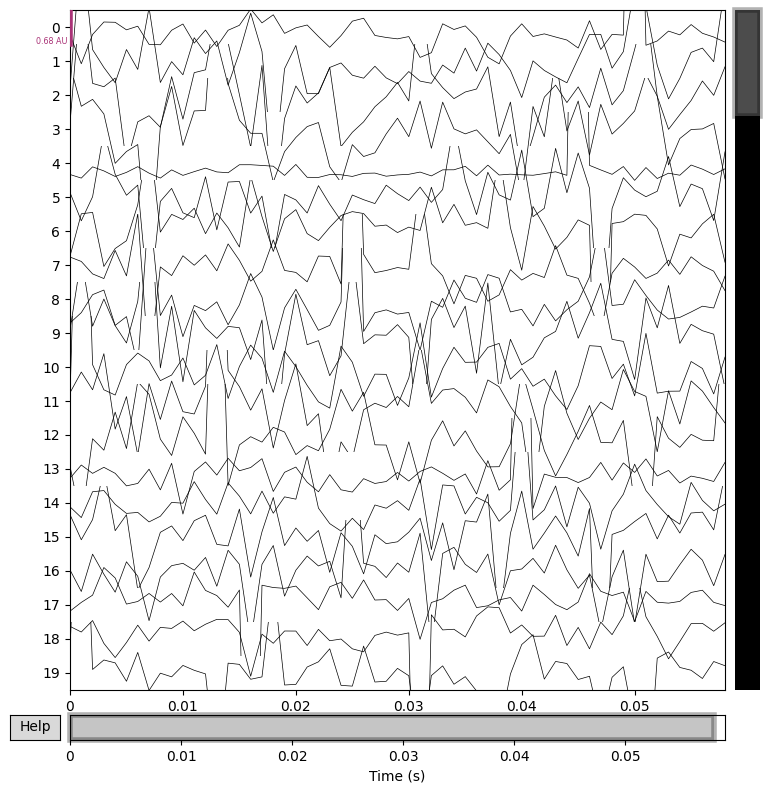

Channels marked as bad:
none


In [9]:
# %matplotlib tk
# %matplotlib inline

raw.plot()